In [1]:
%load_ext autoreload
%autoreload 2

# Generate images

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc("font", size=SMALL_SIZE)
plt.rc("axes", titlesize=SMALL_SIZE)
plt.rc("axes", labelsize=MEDIUM_SIZE)
plt.rc("xtick", labelsize=SMALL_SIZE)
plt.rc("ytick", labelsize=SMALL_SIZE)
plt.rc("legend", fontsize=SMALL_SIZE)
plt.rc("figure", titlesize=BIGGER_SIZE)

In [4]:
DATA_PATH = Path("../thesis/img/")

# DTW

In [5]:
from fastdtw import fastdtw

In [6]:
ts_0 = np.sin(np.logspace(0, np.log10(2 * np.pi), 30))
ts_1 = np.sin(np.linspace(1, 2 * np.pi, 30))

In [7]:
distance, warping_path = fastdtw(ts_0, ts_1)

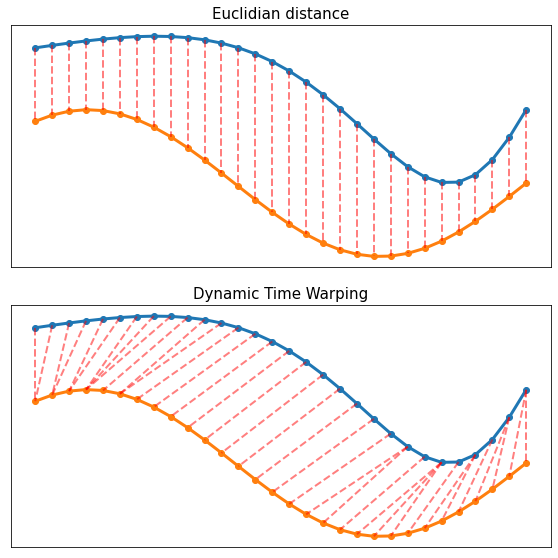

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

for name, ax in zip(["Euclidian distance", "Dynamic Time Warping"], axs):
    ax.plot(ts_0 + 1, "o-", linewidth=3)
    ax.plot(ts_1, "o-", linewidth=3)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title(name)

for x, y in zip(zip(np.arange(30), np.arange(30)), zip(ts_0 + 1, ts_1)):
    axs[0].plot(x, y, "r--", linewidth=2, alpha=0.5)

for x_0, x_1 in warping_path:
    axs[1].plot([x_0, x_1], [ts_0[x_0] + 1, ts_1[x_1]], "r--", linewidth=2, alpha=0.5)

plt.savefig(DATA_PATH / "dtw_vs_euclid.svg")

plt.tight_layout()
plt.show()

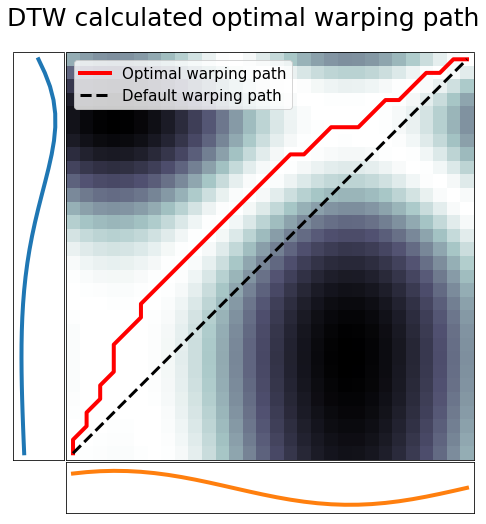

In [9]:
matrix = (ts_0.reshape(-1, 1) - ts_1) ** 2

x = [x for x, _ in warping_path]
y = [y for _, y in warping_path]

# plt.close('all')
fig = plt.figure(figsize=(8, 8))


gs = fig.add_gridspec(
    2,
    2,
    width_ratios=(1, 8),
    height_ratios=(8, 1),
    left=0.1,
    right=0.9,
    bottom=0.1,
    top=0.9,
    wspace=0.01,
    hspace=0.01,
)

fig.tight_layout()

ax_ts_x = fig.add_subplot(gs[0, 0])
ax_ts_y = fig.add_subplot(gs[1, 1])
ax = fig.add_subplot(gs[0, 1], sharex=ax_ts_y, sharey=ax_ts_x)

ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(axis="x", labelbottom=False)
ax.tick_params(axis="y", labelleft=False)
fig.suptitle("DTW calculated optimal warping path")

im = ax.imshow(np.log1p(matrix), origin="lower", cmap="bone_r")


ax.plot(y, x, "r", linewidth=4, label="Optimal warping path")
ax.plot(
    [0, 29], [0, 29], "--", linewidth=3, color="black", label="Default warping path"
)

ax.legend()

ax_ts_x.plot(ts_0 * -1, np.arange(30), linewidth=4, color="#1f77b4")
# ax_ts_x.set_yticks(np.arange(30))
ax_ts_x.set_ylim(-0.5, 29.5)
ax_ts_x.set_xlim(-1.5, 1.5)
ax_ts_x.set_xticks([])


ax_ts_y.plot(ts_1, linewidth=4, color="#ff7f0e")
# ax_ts_y.set_xticks(np.arange(30))
ax_ts_y.set_xlim(-0.5, 29.5)
ax_ts_y.set_ylim(-1.5, 1.5)
ax_ts_y.set_yticks([])


# cbar = plt.colorbar(im, ax=ax, use_gridspec=False, panchor=False)


plt.savefig(DATA_PATH / "dtw_warping_path.svg")

plt.show()

# TSNE

In [10]:
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.datasets import make_s_curve, make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [11]:
n_samples = 1500
X, y = make_swiss_roll(n_samples, noise=0.1)
X, y = make_s_curve(n_samples, random_state=42)

<ipython-input-12-849cbf660a66>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")
<ipython-input-12-849cbf660a66>:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


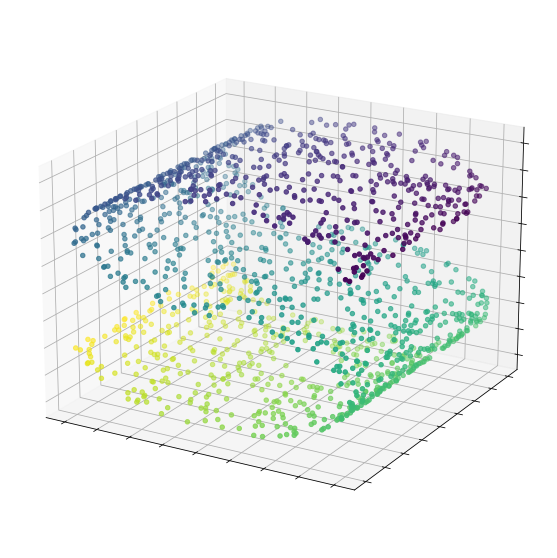

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection="3d")
ax.view_init(20, -60)
# ax.set_title("S curve dataset", fontsize=18)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])
fig.tight_layout()

plt.savefig(DATA_PATH / "s_dataset.svg", bbox_inches=0)

plt.show()

In [13]:
X_pca = PCA(n_components=2, random_state=42).fit_transform(X)
X_tsne = TSNE(n_components=2, perplexity=30, init="pca", random_state=42).fit_transform(
    X
)

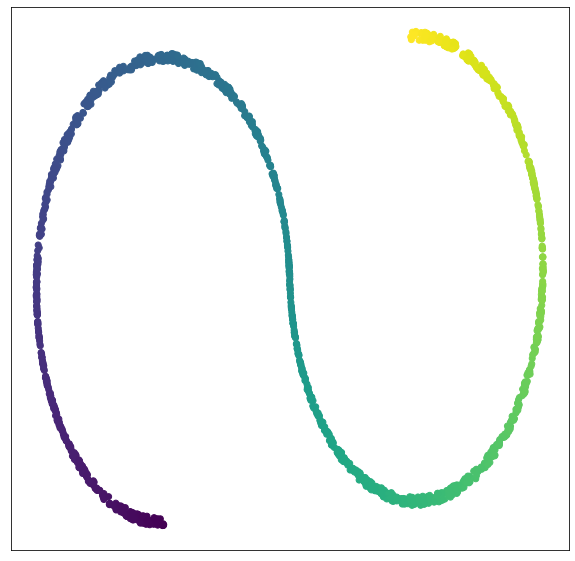

In [14]:
fig = plt.figure(figsize=(10, 10))

# plt.title("PCA transformation", fontsize=18)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xticks([])
plt.yticks([])

plt.savefig(DATA_PATH / "s_dataset_pca.svg")

plt.show()

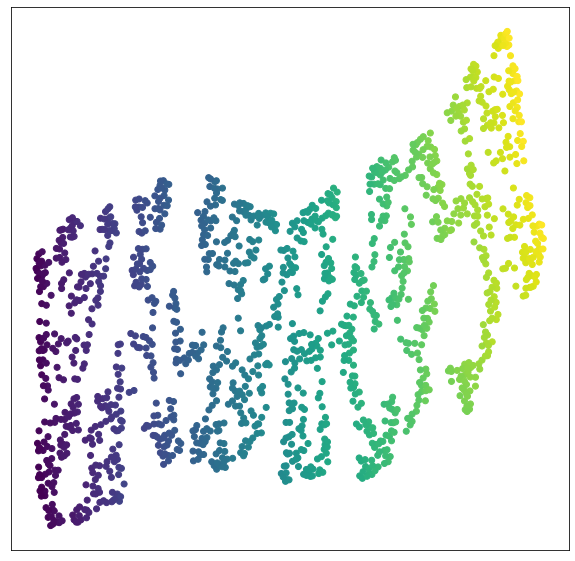

In [15]:
fig = plt.figure(figsize=(10, 10))

# plt.title("t-SNE transformation", fontsize=18)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)

plt.xticks([])
plt.yticks([])


plt.savefig(DATA_PATH / "s_dataset_tsne.svg")


plt.show()

# Datashader

In [16]:
import datashader as ds
import datashader.transfer_functions as tf
import matplotlib.patches as mpatches
from lttb import downsample

In [17]:
np.random.seed(42)
signal = np.random.normal(0, 10, size=10 ** 6).cumsum() + np.sin(
    np.linspace(0, 100 * np.pi, 10 ** 6)
) * np.random.normal(0, 1, size=10 ** 6)

s_frame = pd.DataFrame(signal, columns=["signal"]).reset_index()

In [18]:
x = 1500
y = 500

cvs = ds.Canvas(plot_height=y, plot_width=x)
line = cvs.line(s_frame, "index", "signal")

img = tf.shade(line).to_pil()

In [19]:
trans = downsample(s_frame.values, 100)
trans[:, 0] /= trans[:, 0].max()
trans[:, 0] *= x
trans[:, 1] *= -1
trans[:, 1] -= trans[:, 1].min()
trans[:, 1] /= trans[:, 1].max()
trans[:, 1] *= y

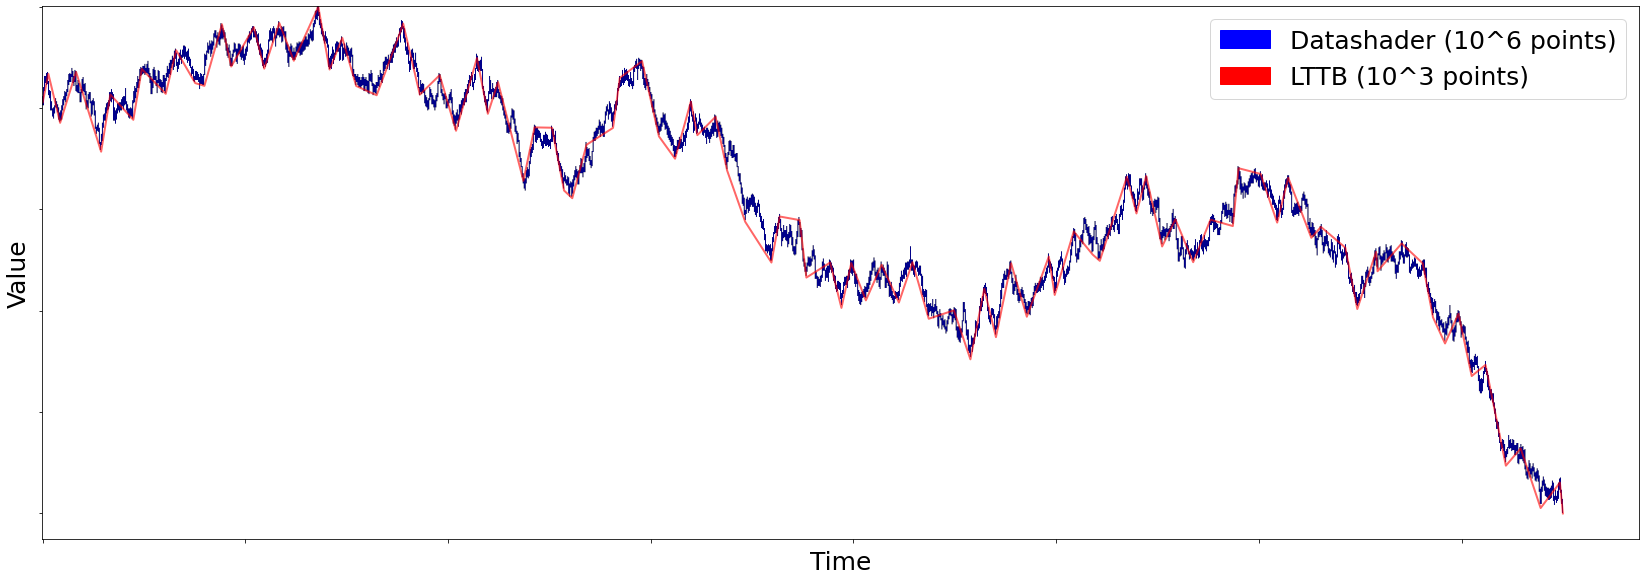

In [20]:
fig, ax = plt.subplots(figsize=(x / 60, y / 60))

plt.imshow(img, origin="upper")

plt.plot(*trans.T, "r", alpha=0.6, linewidth=2)
plt.legend(
    handles=[
        mpatches.Patch(color="blue", label="Datashader (10^6 points)"),
        mpatches.Patch(color="red", label="LTTB (10^3 points)"),
    ],
    prop={"size": 25},
)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.ylabel("Value", fontsize=25)
plt.xlabel("Time", fontsize=25)
plt.tight_layout()
plt.savefig(DATA_PATH / "datashader.png")

plt.show()

# LTTB

In [21]:
from matplotlib import cm
from matplotlib.colors import Normalize
from matplotlib.patches import Polygon

In [22]:
np.random.seed(42)
ns = np.random.normal(0, 1, size=26).cumsum()

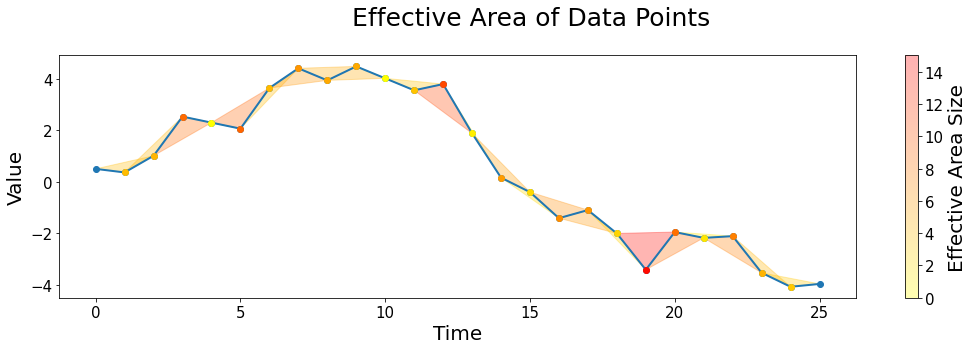

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

plt.plot(ns, "-o", linewidth=2)

mapper = cm.ScalarMappable(Normalize(vmin=0, vmax=15, clip=True), cmap="autumn_r")

areas = []

for i, data in enumerate(ns[:-2], 1):

    cors = [[i + ui, ns[i + ui]] for ui in range(-1, 2)]
    x = [m[0] for m in cors]
    y = [m[1] for m in cors]

    ea = 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1))) * 10

    areas.append(ea)

    color = mapper.to_rgba(ea)

    plt.plot([i], [ns[i]], "o", color=color)

    ax.add_patch(
        Polygon(
            cors,
            closed=True,
            fill=True,
            alpha=0.3,
            color=color,
        )
    )


cbar = plt.colorbar(mapper, alpha=0.3)
cbar.set_label("Effective Area Size")

fig.suptitle("Effective Area of Data Points")
plt.ylabel("Value")
plt.xlabel("Time")

plt.tight_layout()
plt.savefig(DATA_PATH / "effective-area.svg")
plt.savefig(DATA_PATH / "effective-area.png")

plt.show()

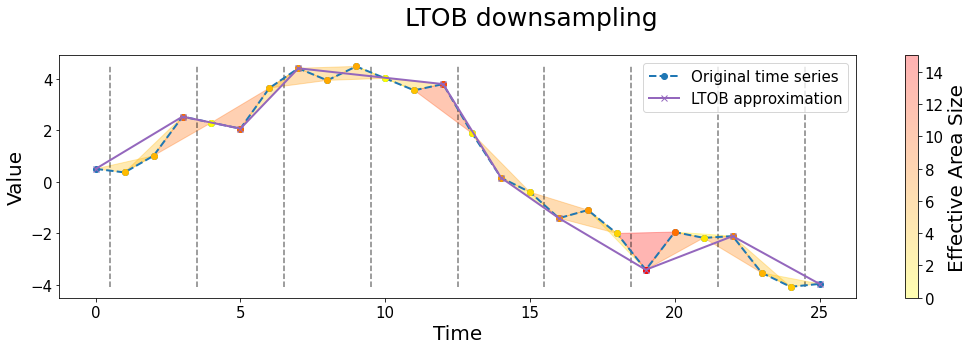

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

plt.plot(ns, "--o", linewidth=2, label="Original time series")

mapper = cm.ScalarMappable(Normalize(vmin=0, vmax=15, clip=True), cmap="autumn_r")


lotb = np.concatenate(
    [[0], np.arange(1, 25, 3) + np.array(areas).reshape(-1, 3).argmax(axis=1), [25]]
)

for i, data in enumerate(ns[:-2], 1):

    cors = [[i + ui, ns[i + ui]] for ui in range(-1, 2)]

    x = [m[0] for m in cors]
    y = [m[1] for m in cors]

    ea = 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1))) * 10

    color = mapper.to_rgba(ea)  # cm.tab10.colors[i % 5 + 1]

    plt.plot([i], [ns[i]], "o", color=color)

    ax.add_patch(
        Polygon(
            cors,
            closed=True,
            fill=True,
            alpha=0.3,
            color=color,
        )
    )

plt.plot(
    lotb, ns[lotb], "-x", linewidth=2, color="tab:purple", label="LTOB approximation"
)

cbar = plt.colorbar(mapper, alpha=0.3)
cbar.set_label("Effective Area Size")

plt.vlines(np.linspace(0.5, 24.5, 9), ns.min(), ns.max(), "black", "--", alpha=0.5)
plt.ylabel("Value")
plt.xlabel("Time")

fig.suptitle("LTOB downsampling")
plt.legend()
plt.tight_layout()


plt.savefig(DATA_PATH / "ltob.svg")
plt.savefig(DATA_PATH / "ltob.png")
plt.show()

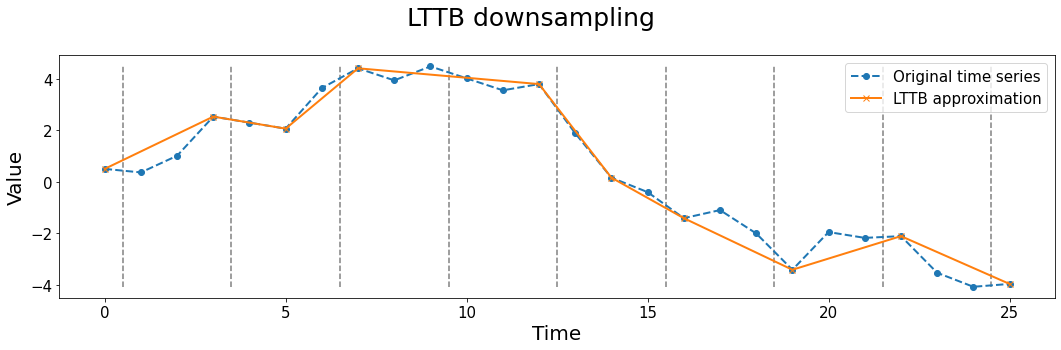

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

plt.plot(ns, "--o", linewidth=2, label="Original time series")

ds = downsample(np.vstack([np.arange(26), ns]).T, 10)


plt.plot(*ds.T, "-x", linewidth=2, label="LTTB approximation")
# plt.plot(ns, "x")

plt.vlines(np.linspace(0.5, 24.5, 9), ns.min(), ns.max(), "black", "--", alpha=0.5)
plt.ylabel("Value")
plt.xlabel("Time")

fig.suptitle("LTTB downsampling")
plt.legend()
plt.tight_layout()

plt.savefig(DATA_PATH / "lttb.svg")
plt.savefig(DATA_PATH / "lttb.png")

plt.show()